In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Section 1.1

In [105]:
def f(x):
    return (-x*x)
def grad(x):
    return (-2*x)
## see how it works
x0 = 0.1

R = 0.1
x1 = x0 + R*grad(x0)

print(f(x0))
print(grad(x0))
print (x1)

-0.010000000000000002
-0.2
0.08


In [106]:
l=[]
i = 0

while True:
    a = x0
    fx = f(x0)
    gradient = grad(x0)
    
    print("Value of function fx:",fx)
    print("Value of the gradient:",gradient)
    
    l.append(x0 + (R)*grad(x0))
    x0 = l[i]
    
    if abs(grad(f(x0))) < (0.000001) or i > 50:
        print ("\n\nTotal number of iterations:",i-1)
        print ("Solution value:",l[i])
        break
    else:
        i = i + 1

Value of function fx: -0.010000000000000002
Value of the gradient: -0.2
Value of function fx: -0.0064
Value of the gradient: -0.16
Value of function fx: -0.004096
Value of the gradient: -0.128
Value of function fx: -0.00262144
Value of the gradient: -0.1024
Value of function fx: -0.0016777216000000003
Value of the gradient: -0.08192
Value of function fx: -0.0010737418240000004
Value of the gradient: -0.06553600000000001
Value of function fx: -0.0006871947673600003
Value of the gradient: -0.05242880000000001
Value of function fx: -0.00043980465111040015
Value of the gradient: -0.04194304000000001
Value of function fx: -0.00028147497671065613
Value of the gradient: -0.03355443200000001
Value of function fx: -0.00018014398509481994
Value of the gradient: -0.026843545600000008
Value of function fx: -0.00011529215046068476
Value of the gradient: -0.021474836480000006
Value of function fx: -7.378697629483823e-05
Value of the gradient: -0.017179869184000003
Value of function fx: -4.7223664828

In [107]:
# Section 1.2

In [108]:
def f(x,A):
    return (-x.T @ A @ x)
def grad(x,A):
    return (-2 * A @ x)

## see how it works
x0 = np.matrix("2;-3")
A = np.matrix("1,2;2,8")
R = 0.1
print(f(x0,A))
print(grad(x0,A))

[[-52]]
[[ 8]
 [40]]


In [109]:
def gradient_ascent(x0,A,R):
    m0 = []
    l1 = []
    cnt = 0

    while True:
        m0.append(x0[0,0])
        l1.append(x0[1,0])
        x1 = x0 + (R*grad(x0,A))
        m0.append(x1[0,0])
        l1.append(x1[1,0])
        if abs(f(x1,A)-f(x0,A)) < (1e-6) or cnt == 20:
            break
        else:
            x0 = x1
            cnt = cnt + 1
    print (m0)
    return (m0,l1)

In [110]:
## create 30x30 grid matrix
n = 30
ex1 = np.linspace(-5, 4, num=n)
ex2 = np.linspace(-5, 4, num=n)
grid1, grid2 = np.meshgrid(ex1, ex2)
## fill the grid via looping.  You may prefer to use ufuncs instead.
z = np.empty_like(grid1)
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        x = np.array([grid1[i,j], grid2[i,j]])
        z[i,j] = f(x,A)[0][0]

[2, 2.7999999999999998, 2.7999999999999998, 1.8399999999999999, 1.8399999999999999, 2.1600000000000001, 2.1600000000000001, 1.6095999999999999, 1.6095999999999999, 1.7043200000000001, 1.7043200000000001, 1.371008, 1.371008, 1.3649664000000001, 1.3649664000000001, 1.1504384000000001, 1.1504384000000001, 1.1036661760000002, 1.1036661760000002, 0.95701381120000006, 0.95701381120000006, 0.89774911488000009, 0.89774911488000009, 0.79203866214400009, 0.79203866214400009, 0.73296716595200007, 0.73296716595200007, 0.65349817696256007, 0.65349817696256007, 0.59979862160179209, 0.59979862160179209, 0.5381985575763969, 0.5381985575763969, 0.49151082934042634, 0.49151082934042634, 0.4427492427169793, 0.4427492427169793, 0.40311677932126871, 0.40311677932126871, 0.36398287120312045, 0.36398287120312045, 0.33079131300623604]


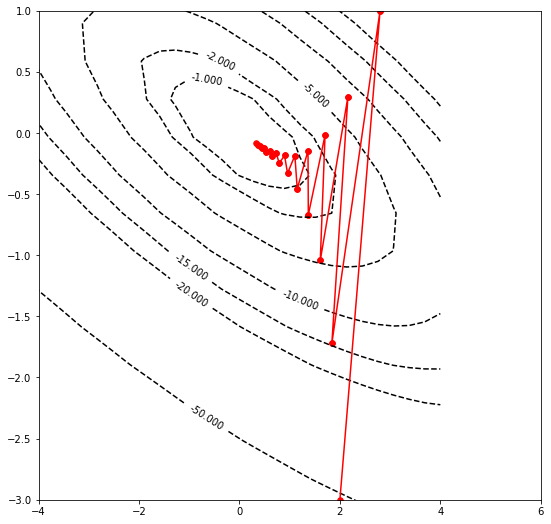

In [111]:
## Make the plot
plt.figure(figsize=(9,9))
p = plt.contour(grid1, grid2, z,
                levels = [-50, -20, -15, -10, -5, -2, -1, 0, 1, 2, 5, 10, 20, 50],
                colors = 'black')
plt.xlim(-4,6)
plt.ylim(-3,1)
plt.clabel(p, inline=1, fontsize=10)

x0 = np.matrix("2; -3")
A = np.matrix("1,2;2,8")
R = 0.1
m0, l1 = gradient_ascent(x0,A,R)

## Add a few points
plt.scatter(m0, l1, c='red', s=30)
plt.plot(m0, l1, c='red')

In [112]:
A = np.matrix(np.arange(1,26).reshape(5,5))
A = 1/2 * (A + A.T) + 10 * (np.eye(5))
A.astype(int)

matrix([[11,  4,  7, 10, 13],
        [ 4, 17, 10, 13, 16],
        [ 7, 10, 23, 16, 19],
        [10, 13, 16, 29, 22],
        [13, 16, 19, 22, 35]])

In [113]:
# Section 1.3

In [114]:
ev = np.linalg.eig(A)
print('\neigenvalues\n', ev)
val, vec = np.linalg.eig(A)
print('\neigenvalues\n', val)
print('\ncondition number', np.linalg.cond(A))
print('\neigenvectors\n', vec)


eigenvalues
 (array([ 81.31043674,   3.68956326,  10.        ,  10.        ,  10.        ]), matrix([[ -2.48318441e-01,  -7.33715171e-01,   6.32455532e-01,
           1.22417347e-01,   2.57430627e-01],
        [ -3.38483952e-01,  -4.30614229e-01,  -6.32455532e-01,
           3.60186977e-01,  -4.77461925e-01],
        [ -4.28649462e-01,  -1.27513288e-01,  -3.16227766e-01,
          -5.28528454e-01,   4.99558849e-01],
        [ -5.18814973e-01,   1.75587654e-01,   3.22700303e-16,
          -5.13173410e-01,  -5.96454433e-01],
        [ -6.08980483e-01,   4.78688595e-01,   3.16227766e-01,
           5.59097540e-01,   3.16926881e-01]]))

eigenvalues
 [ 81.31043674   3.68956326  10.          10.          10.        ]

condition number 22.0379570765

eigenvectors
 [[ -2.48318441e-01  -7.33715171e-01   6.32455532e-01   1.22417347e-01
    2.57430627e-01]
 [ -3.38483952e-01  -4.30614229e-01  -6.32455532e-01   3.60186977e-01
   -4.77461925e-01]
 [ -4.28649462e-01  -1.27513288e-01  -3.16227766e-0

In [115]:
condition_number = np.sqrt(max(abs(val))/abs(min(abs(val))))
condition_number

4.6944602540140332

In [116]:
A = np.ones(4).reshape(2,2).astype(int)
A

array([[1, 1],
       [1, 1]])

In [117]:
Determinant_A = np.linalg.det(A)
Determinant_A

0.0

In [118]:
alpha = 1
C = np.matrix(A + np.eye(2) * alpha)
C.astype(int)

matrix([[2, 1],
        [1, 2]])

In [119]:
def eig_cond(A):
    ev = np.linalg.eig(A)
    val, vec = np.linalg.eig(A)
    condn = np.sqrt(max(abs(val))/abs(min(abs(val))))
    return (val, vec, condn)

In [120]:
val, vec, condn = eig_cond(C)

In [121]:
x0 = np.matrix("2; -3")
f(x0,C)

matrix([[-14.]])

In [122]:
## create 30x30 grid matrix
n = 30
ex1 = np.linspace(-5, 4, num=n)
ex2 = np.linspace(-5, 4, num=n)
grid1, grid2 = np.meshgrid(ex1, ex2)
## fill the grid via looping.  You may prefer to use ufuncs instead.
z = np.empty_like(grid1)
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        x = np.array([grid1[i,j], grid2[i,j]])
        z[i,j] = f(x,C)[0][0]

[2, 1.5, 1.5, 0.5, 0.5, 0.375, 0.375, 0.125, 0.125, 0.09375, 0.09375, 0.03125, 0.03125, 0.0234375, 0.0234375, 0.0078125, 0.0078125, 0.005859375, 0.005859375, 0.001953125, 0.001953125, 0.00146484375, 0.00146484375, 0.00048828125, 0.00048828125, 0.0003662109375]


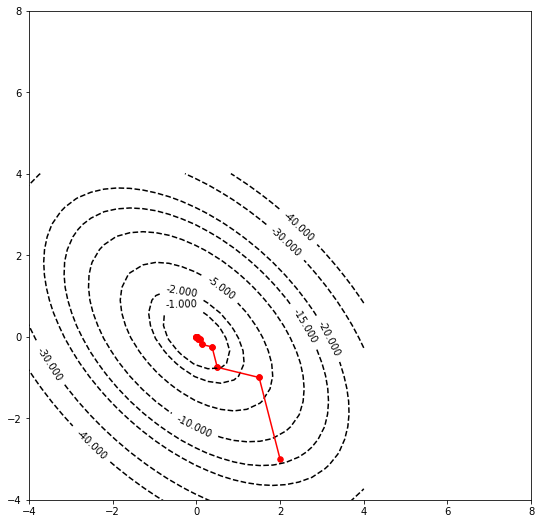

In [123]:
## Make the plot
plt.figure(figsize=(9,9))
p = plt.contour(grid1, grid2, z,
                levels = [-40, -30,-20, -15, -10, -5, -2, -1, 0, 1, 2, 5, 10, 20, 40],
                colors = 'black')
plt.xlim(-4,8)
plt.ylim(-4,8)
plt.clabel(p, inline=1, fontsize=10)


x0 = np.matrix("2; -3")
R = 0.25
m0, l1 = gradient_ascent(x0,C,R)

## Add a few points
plt.scatter(m0, l1, c='red', s=30)
plt.plot(m0, l1, c='red')

In [124]:
# Section 2.1

In [125]:
R = 1000
N = 10

In [126]:
m = np.random.normal(size=(R,N)).mean(axis=1)

In [127]:
mu = np.mean(m)
print("Mean of means:",mu)

Mean of means: -0.00624029385502


In [128]:
sd = np.std(m)
print("Standard Deviation of means:",sd)

Standard Deviation of means: 0.307512911296


In [129]:
CI_Upper = mu + (1.96 * sd)
CI_Lower = mu - (1.96 * sd)
print("95% Upper limit:",CI_Upper)
print("95% Lower limit:",CI_Lower)

95% Upper limit: 0.596485012284
95% Lower limit: -0.608965599994


In [130]:
np.percentile(m,2.4)

-0.6234521931624919

In [131]:
# 2.2 Section 

In [132]:
R = 1000
N = 10

10


([array([ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([ 9.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 9.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 6.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.]),
  array([ 7.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
  array([ 9.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])],
 array([  1.00036148,   6.38312478,  11.76588808,  17.14865139,
         22.53141469,  27.914178  ,  33.2969413 ,  38.67970461,
         44.06246791,  49.44523121,  54.82799452]),
 <a list of 10 Lists of Patches objects>)

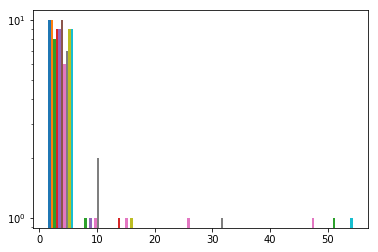

In [133]:
b = np.random.pareto(a=1,size=(10,10)) + 1
print(len(b))
plt.hist(b, log=True)

1000


([array([ 999.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 999.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 999.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 999.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
  array([ 996.,    2.,    0.,    0.,    0.,    1.,    1.,    0.,    0.,    0.]),
  array([ 999.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 998.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 999.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 997.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])],
 array([  1.00004865e+00,   5.22918892e+02,   1.04483773e+03,
          1.56675658e+03,   2.08867542e+03,   2.61059426e+03,
          3.13251311e+03,   3.65443195e+03,   

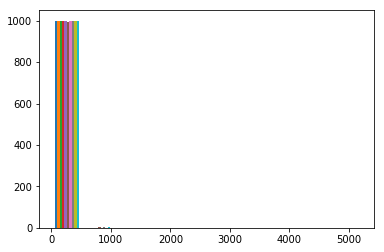

In [134]:
b = np.random.pareto(a=1,size=(R,N)) + 1
print(len(b))
plt.hist(b)

In [135]:
mu = np.random.pareto(a=1,size=(R,N)).mean(axis=1)
mu

array([  4.27745578e+00,   1.57005745e+00,   9.58196805e+00,
         2.69939143e+00,   1.60134621e+00,   1.09056365e+01,
         4.33719357e+00,   1.84854367e+00,   1.40861219e+00,
         6.50461979e+00,   6.54788293e+00,   1.24877593e+01,
         2.48106711e+00,   3.84513929e+00,   7.42024040e+00,
         1.69127836e+00,   2.15074386e+00,   4.19676244e+00,
         3.59877335e+00,   7.05621441e-01,   8.75345546e-01,
         7.98054722e-01,   5.35155994e+00,   5.76256759e+00,
         1.99033443e+01,   1.10229931e+00,   1.85708885e+00,
         1.53015217e+00,   1.62635788e+00,   2.34302241e+00,
         5.30732229e+01,   5.41222443e-01,   5.67190227e+00,
         1.72361245e+00,   1.00140160e+00,   2.46047735e+00,
         5.38891823e+00,   3.04728918e+00,   6.37200757e+00,
         6.62158641e+00,   1.03936698e+00,   2.64612416e+00,
         3.23532462e+00,   3.55169707e+00,   2.63778692e+00,
         4.81695589e+00,   6.55414954e+00,   8.31641737e+00,
         1.52317655e+01,

In [136]:
mm = np.mean(mu)
mm

7.6646194320456305

In [137]:
sd = np.std(mu)
sd

30.961980947460461

In [138]:
CI_Upper = mm + (1.96 * sd)
CI_Lower = mm - (1.96 * sd)
print("95% Upper limit:",CI_Upper)
print("95% Lower limit:",CI_Lower)

95% Upper limit: 68.3501020891
95% Lower limit: -53.020863225
